# **House Price Prediction Using Mutilple Linear Regression**

Importing Libraries

In [1]:
from sklearn.datasets import load_boston

In [26]:
boston= load_boston()

X= boston.data
y= boston .target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [27]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [28]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [29]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
import pandas as pd
df= pd.DataFrame(X)
df.columns= boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


#Normalizing dataset


In [32]:
import numpy as np
u = np.mean(X,axis=0)
std = np.std(X,axis=0)


In [33]:
X= (X-u)/std
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


# Plot Y vs any features

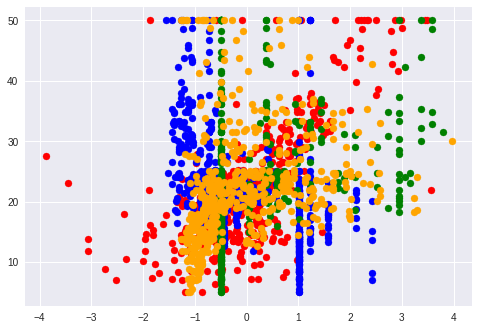

In [34]:


import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.scatter(X[:,5],y,color='red')
plt.scatter(X[:,2],y,color='blue')
plt.scatter(X[:,1],y,color='green')
plt.scatter(X[:,7],y,color='orange')
plt.show()

# Linear Regression on Multiple Features

In [35]:
X.shape, y.shape

((506, 13), (506,))

In [36]:
ones= np.ones((X.shape[0],1))
X=np.hstack((ones,X))
print(X.shape)

(506, 14)


In [47]:
# X- Matrix (mxn)
# x- Vectopr (Single Example with n features)
def hypothesis(x,theta):
  y_=0.0
  n=x.shape[0]
  for i in range(n):
    y_ += (theta[i]*x[i])
  return y_

def error(X,Y, theta):
  e=0.0
  m=X.shape[0]
  for i in range(m):
    y_=hypothesis(X[i],theta)
    e+= (y[i]-y_)**2
  return e/m

def gradient(X,y,theta):
  m,n=X.shape
  grad=np.zeros((n,))

  #for all values of j
  for j in range(n):
    #sum over all examples
    for i in range(m):
      y_=hypothesis(X[i],theta)
      grad[j] += (y_-y[i])*X[i][j]
  return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_it=300):
  m,n=X.shape
  theta=np.zeros((n,))
  error_list=[]

  for i in range(max_it):
    e=error(X,y,theta)
    error_list.append(e)

    #Gradient Descent
    grad=gradient(X,y,theta)
    for j in range(n):
      theta[j]=theta[j]-learning_rate*grad[j]
  return theta,error_list



In [48]:
import time
start=time.time()
theta,error_list= gradient_descent(X,y)
end=time.time()
print("Time taken is ",end-start)

Time taken is  20.61675477027893


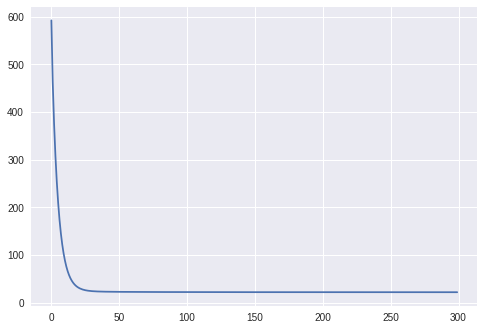

In [50]:
plt.plot(error_list)

# Predictions

In [53]:
y_=[]
for i in range(X.shape[0]):
  pred= hypothesis(X[i],theta)
  y_.append(pred)
y_=np.array(y_)

In [54]:
def r2_score(y,y_):
  num=np.sum((y-y_)**2)
  denom=np.sum((y-y.mean())**2)
  score=(1-num/denom)
  return score*100
  

# Score of algorithm

In [55]:
r2_score(y,y_)

74.04541323942743

# **Optmising Code**

In [57]:
def hypothesis(X,theta):
  return np.dot(X,theta)

def error(X,y,theta):
  error=0.0
  m=X.shape[0]
  y_=hypothesis(X,theta)
  e=np.sum((y-y_)**2)

  return e/m

def gradient(X,y,theta):
  y_=hypothesis(X,theta)
  grad=np.dot(X.T,(y_-y))
  m=X.shape[0]
  return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_iters=300):
  n=X.shape[1]
  theta=np.zeros((n,))
  error_list=[]
  for i in range(max_iters):
    e=error(X,y,theta)
    error_list.append(e)
    grad=gradient(X,y,theta)
    theta=theta-learning_rate*grad
  return theta,error_list


In [58]:
import time
start=time.time()
theta,error_list= gradient_descent(X,y)
end=time.time()
print("Time taken is ",end-start)

Time taken is  0.017221450805664062


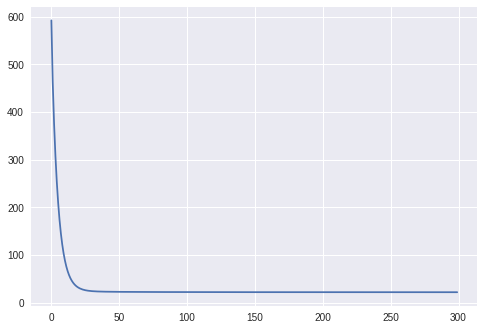

In [59]:
plt.plot(error_list)

In [60]:
r2_score(y,y_)

74.04541323942743